<div class="alert alert-info" role="alert">
 <p class ="lead"> 
 <h1>Física Computacional </h1>
 <h2>Tarea 2</h2>
 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Julia_Programming_Language_Logo.svg/1200px-Julia_Programming_Language_Logo.svg.png" style="height:42px;display:inline">


> Autor: Celeste Castro Granados $\mathbb C \hat{e}l \mathbb s$

## 1.
La integral numérica en la que en la que se aproxima la integral de una función es la siguiente:

$$ \int_{x_i -h}^{x_i+h} f(x) dx = \frac{f(x_{i-1})+4 f(x_i) + f(x_i + 1)}{3} h + \mathbb O(h^5) $$

donde se desprecian los términos $ \mathbb O(h^5$). (Suponiendo una malla uniforme)

La función tendrá que contemplar si el número de puntos en la malla (N) es par o impar, ya que para calcular la integral en un punto $x_i$ contemplamos el $x_{i+1}$ y el $x_{i-1}$, es decir, se avanza de 2 en 2 por lo que podría llegar a sobrar 1 punto en la malla.

En clase analizamos ambos casos, sin embargo, tendremos que realizarle un ligero cambio a dicho análisis ya que la indexación es diferente. En clase la indexación que consideramos empezaba en 0 contrario a Julia que empieza en 1, por lo que, si la N (de clase) es par, nuestra N es impar y viceversa, i.e. el las consideraciones que vimos en clase para N par, las tomaremos como si se tratara de N impar, y viceversa. Y además, i empezará en un índice posterior. 

Por lo tanto, tenemos lo siguiente:

***Si N es impar, la suma tendrá que empezar en $i=2$ y terminar en N-1.***

***Si N es par, la suma tendrá que empezar en $i=3$ y terminar en N-1 como en el caso anterior. En este caso, $x_1$ se realiza de forma independiente para que al final si alcancen todos los puntos.*** 

$\Rightarrow$ La ecuación para el primer intervalo será:

$$ \frac{h}{48} (23 f_1 + 26f_2 - 4f_3 + 6f_4 -3f_5) $$

A continuación procedemos a programar este algoritmo. 


In [1]:
function int_num(x,y) #x-malla de puntos, y-función a la cual le vamos a calcular su integral
    integral = 0 #Definimos la integral para poder utilizarla más adelante
    h = x[2] - x[1] #h siempre tendrá el mismo valor porque se trata de una malla uniforme
    
    #Utilizaremos la función módulo para saber si el número de puntos en la malla es par o impar
    #y saber en donde inicia la suma
    if mod(length(y),2) == 0 #Par
        inicio = 3
    elseif mod(length(y),2) == 1 #Impar
        inicio = 2        
    end
    
    #Utilizaremos un for para que vaya sumando la integral de cada intervalo
    for i in inicio:2:length(y)-1 #Avanza de 2 en 2 y termina en N-1
        integral += y[i+1] + 4*y[i] + y[i-1]
    end
    integral = integral*(h/3)
    
    #Agregamos la expresión para el primer intervalo en caso de que N sea par
    if mod(length(y),2) == 0
        integral += (h/48)*(23*y[1] + 26*y[2] - 4*y[3] + 6*y[4] -3*y[5])
    end
    return integral
end

int_num (generic function with 1 method)

Ahora, tenemos que:
$$ f(x)=e^{-x^2} sin(10x) $$
$$ g(x)=-\frac{2}{x^6} + \frac{1}{x^{12}}$$

Vamos a programar estas funciones para poder utilizarlas más adelante.


In [2]:
function f(x)
    f=exp.(-(x.^2)).*sin.(10*x)
    return f
end

f (generic function with 1 method)

In [3]:
function g(x)
    g=-2*((x.^6).^(-1)) + 1*((x.^(12)).^(-1))
    return g
end

g (generic function with 1 method)

Calculamos las integrales de las siguientes funciones para una malla uniforme:


En cada inciso calcularemos la integral tanto para una malla con número de puntos par como para una con número de puntos impar; para probar que nuestro algoritmo funciona bien en ambos casos.

**a)** $$ \int_0^5 f(x) dx $$

El resultado analítico de esta integral es 0.102134 (Calculado numéricamente en Wolfram)

In [4]:
#N par
x = collect(range(0,stop=5,length=1000))
print("Número de puntos en la malla: ", length(x))
y = f(x)
integral_par=int_num(x,y)

Número de puntos en la malla: 1000

0.10213418840800859

In [5]:
#N impar
x = collect(range(0,stop=5,length=1001))
print("Número de puntos en la malla: ", length(x))
y = f(x)
integral_impar=int_num(x,y)

Número de puntos en la malla: 1001

0.1021340781055997

In [6]:
print("El error para el caso par es: ",abs(integral_par-0.102134))

El error para el caso par es: 1.8840800858344053e-7

In [7]:
print("El error para el caso impar es: ",abs(integral_impar-0.102134))

El error para el caso impar es: 7.81055996962321e-8

Observamos que en ambos casos el resultado tiene una precisión mayor a $10^{-4}$.

**b)** $$ \int_{-5}^5 f^2(x) dx $$

El resultado analítico de esta integral es 0.6266570686577501 (Calculado en Wolfram)

In [8]:
#N par
x = collect(range(-5,stop=5,length=1000))
print("Número de puntos en la malla: ", length(x))
y = (f(x)).^2
integral_par=int_num(x,y)

Número de puntos en la malla: 1000

0.6266570686577498

In [9]:
#N impar
x = collect(range(-5,stop=5,length=1001))
print("Número de puntos en la malla: ", length(x))
y = (f(x)).^2
integral_impar=int_num(x,y)

Número de puntos en la malla: 1001

0.6266570686577368

In [10]:
print("El error para el caso par es: ",abs(integral_par-0.6266570686577501))

El error para el caso par es: 2.220446049250313e-16

In [11]:
print("El error para el caso impar es: ",abs(integral_impar-0.6266570686577501))

El error para el caso impar es: 1.3211653993039363e-14

Observamos que en ambos casos el resultado tiene una precisión mayor a $10^{-4}$.

**c)** $$ \int_{0.5}^5 g(x) dx $$


El resultado analítico de esta integral es 173.382 (Calculado numéricamente en Wolfram)

In [12]:
#N par
x = collect(range(0.5,stop=5,length=10000))
print("Número de puntos en la malla: ", length(x))
y = g(x)
integral_par=int_num(x,y)

Número de puntos en la malla: 10000

173.38194667176072

In [13]:
#N impar
x = collect(range(0.5,stop=5,length=10001))
print("Número de puntos en la malla: ", length(x))
y = g(x)
integral_impar=int_num(x,y)

Número de puntos en la malla: 10001

173.38194619616306

In [14]:
print("El error para el caso par es: ",abs(integral_par-173.382))

El error para el caso par es: 5.332823928938524e-5

In [15]:
print("El error para el caso impar es: ",abs(integral_impar-173.382))

El error para el caso impar es: 5.380383694841839e-5

Observamos que en ambos casos el resultado tiene una precisión mayor a $10^{-4}$.

## 2. Haga una función que implemente la integral numérica utilizando la regla de "Simpson $\frac{3}{8}$".

La integral numérica utilizando la regla de "Simpson $\frac{3}{8}$" está dada por la siguiente relación:

$$ \int_{x_i}^{x_{i+3}} f(x) dx = \frac{3h}{8} (f(x_i) + 3f(x_{i+1}) + 3f(x_{i+2}) + f(x_{i+3})) + \mathbb O(h^5) $$

donde se desprecian los términos $\mathbb O (h^5)$.

Al igual que en el problema 1 tendremos que considerar distintos casos. Observamos que para calcular la integral en el punto $x_i$ se contemplan los puntos $x_{i+1}$,$x_{i+2}$ y $x_{i+3}$, es decir, empieza en $i=1$ y se avanza de 3 en 3, por lo que la suma termina en $N-3$. Sin embargo, puede suceder que el número de puntos en la malla sea tal que lleguen a sobrar 1 ó 2 puntos.  

Por lo tanto, si sobran 2 puntos utilizaremos el algoritmo del problema 1 para dichos puntos y si sobra 1 punto utilizaremos la parte del algoritmo del problema 1 que obtuvimos para el primer intervalo. 

A continuación procedemos a programar lo anterior. 
 

In [16]:
function int_num_simp(x,y) #x-malla de puntos, y-función a la cual le vamos a calcular su integral
    integral = 0 #Definimos la integral para poder utilizarla más adelante
    h = x[2] - x[1] #h siempre tendrá el mismo valor porque se trata de una malla uniforme
    
    if mod(length(y),3) == 1 #No sobra ningún punto
        inicio = 1
    end
    if mod(length(y),3) == 2 #Sobra 1 punto
        inicio = 2
    end
    
    if mod(length(y),3) == 0 #Sobran 2 puntos
        inicio = 3
    end
    
    for i in inicio:3:length(y)-3 #Avanza de 3 en 3 y termina en N-3
        integral += y[i] + 3*y[i+1] + 3*y[i+2] + y[i+3]
    end
    integral = integral*(3*h/8)
        
    #Ahora utilizaremos el algoritmo del problema 1 para agregar 
    #lo correspondiente al 1er intervalo ó a los primeros 2 intervalos.
    
    #Expresión para el 1er intervalo     
    if mod(length(y),3) == 2 #Sobra 1 punto
        integral += (h/48)*(23*y[1] + 26*y[2] - 4*y[3] + 6*y[4] -3*y[5])
    end
    
    #Expresión para los primeros 2 intervalos 
    if mod(length(y),3) == 0 #Sobran 2 puntos
        integral += (h/3)*(y[3] + 4*y[2] + y[1])
    end
    
    return integral
end

int_num_simp (generic function with 1 method)

Vamos a calcular ahora las integrales del problema 1. 

En cada inciso calcularemos la integral para todos los casos que contemplamos arriba, para probar que nuestro algoritmo funciona bien.

**a)** $$ \int_0^5 f(x) dx $$

El resultado analítico de esta integral es 0.102134 (Calculado numéricamente en Wolfram)

In [17]:
#mod(N,3)=0
x = collect(range(0,stop=5,length=1002)) #1002/3=334
print("Número de puntos en la malla: ", length(x))
y = f(x)
integral_0=int_num_simp(x,y)

Número de puntos en la malla: 1002

0.1021340826515684

In [18]:
#mod(N,3)=1
x = collect(range(0,stop=5,length=1003))
print("Número de puntos en la malla: ", length(x))
y = f(x)
integral_1=int_num_simp(x,y)

Número de puntos en la malla: 1003

0.1021340826446728

In [19]:
#mod(N,3)=2
x = collect(range(0,stop=5,length=1004))
print("Número de puntos en la malla: ", length(x))
y = f(x)
integral_2=int_num_simp(x,y)

Número de puntos en la malla: 1004

0.1021341911487815

In [20]:
print("El error para el caso mod(N,3)=0 es: ",abs(integral_0-0.102134))

El error para el caso mod(N,3)=0 es: 8.265156839493137e-8

In [21]:
print("El error para el caso mod(N,3)=1 es: ",abs(integral_1-0.102134))

El error para el caso mod(N,3)=1 es: 8.264467279972543e-8

In [22]:
print("El error para el caso mod(N,3)=2 es: ",abs(integral_2-0.102134))

El error para el caso mod(N,3)=2 es: 1.9114878149761871e-7

Observamos que en todos los casos se tiene una precisión mayor a $10^{-4}$.

**b)** $$ \int_{-5}^5 f^2(x) dx $$

El resultado analítico de esta integral es 0.6266570686577501 (Calculado en Wolfram)

In [23]:
#mod(N,3)=0
x = collect(range(-5,stop=5,length=1002)) #1002/3=334
print("Número de puntos en la malla: ", length(x))
y = (f(x)).^2
integral_0=int_num_simp(x,y)

Número de puntos en la malla: 1002

0.626657068657743

In [24]:
#mod(N,3)=1
x = collect(range(-5,stop=5,length=1003))
print("Número de puntos en la malla: ", length(x))
y = (f(x)).^2
integral_1=int_num_simp(x,y)

Número de puntos en la malla: 1003

0.626657068657726

In [25]:
#mod(N,3)=2
x = collect(range(-5,stop=5,length=1004))
print("Número de puntos en la malla: ", length(x))
y = (f(x)).^2
integral_2=int_num_simp(x,y)

Número de puntos en la malla: 1004

0.6266570686577579

In [26]:
print("El error para el caso mod(N,3)=0 es: ",abs(integral_0-0.6266570686577501))

El error para el caso mod(N,3)=0 es: 7.105427357601002e-15

In [27]:
print("El error para el caso mod(N,3)=1 es: ",abs(integral_1-0.6266570686577501))

El error para el caso mod(N,3)=1 es: 2.4091839634365897e-14

In [28]:
print("El error para el caso mod(N,3)=2 es: ",abs(integral_2-0.6266570686577501))

El error para el caso mod(N,3)=2 es: 7.882583474838611e-15

Observamos que en todos los casos se tiene una precisión mayor a $10^{-4}$.

**c)** $$ \int_{0.5}^5 g(x) dx $$

El resultado analítico de esta integral es 173.382 (Calculado numéricamente en Wolfram)

In [29]:
#mod(N,3)=0
x = collect(range(0.5,stop=5,length=10002)) #10002/3=3334
print("Número de puntos en la malla: ", length(x))
y = g(x)
integral_0=int_num_simp(x,y)

Número de puntos en la malla: 10002

173.38194621589219

In [30]:
#mod(N,3)=1
x = collect(range(0.5,stop=5,length=10003))
print("Número de puntos en la malla: ", length(x))
y = g(x)
integral_1=int_num_simp(x,y)

Número de puntos en la malla: 10003

173.381946216445

In [31]:
#mod(N,3)=2
x = collect(range(0.5,stop=5,length=10004))
print("Número de puntos en la malla: ", length(x))
y = g(x)
integral_2=int_num_simp(x,y)

Número de puntos en la malla: 10004

173.38194669097038

In [32]:
print("El error para el caso mod(N,3)=0 es: ",abs(integral_0-173.382))

El error para el caso mod(N,3)=0 es: 5.378410781986531e-5

In [33]:
print("El error para el caso mod(N,3)=1 es: ",abs(integral_1-173.382))

El error para el caso mod(N,3)=1 es: 5.378355501761689e-5

In [34]:
print("El error para el caso mod(N,3)=2 es: ",abs(integral_2-173.382))

El error para el caso mod(N,3)=2 es: 5.3309029624415416e-5

Observamos que en todos los casos se tiene una precisión mayor a $10^{-4}$.

## 3. Haga una función que implemente la integral numérica utilizando la regla de "Boole".

La integral numérica utilizando la regla de "Boole" está dada por la siguiente relación:

$$ \int_{x_i}^{x_{i+4}} f(x) dx = \frac{2h}{45} (7f(x_i) + 32f(x_{i+1}) + 12f(x_{i+2}) + 32f(x_{i+3}) + 7f(x_{i+4})) + \mathbb O(h^7) $$

donde se desprecian los términos $\mathbb O (h^7)$.

Nuevamente tendremos que considerar distintos casos. Observamos que para calcular la integral en el punto $x_i$ se contemplan los puntos $x_{i+1}$,$x_{i+2}$,$x_{i+3}$ y $x_{i+4}$, es decir, empieza en $i=1$ y se avanza de 4 en 4, por lo que la suma termina en $N-4$. Sin embargo, puede suceder que el número de puntos en la malla sea tal que lleguen a sobrar 1, 2 ó 3 puntos.  

Por lo tanto, tomaremos la misma idea del problema 2. Si sobran 3 puntos utilizaremos el algoritmo de Simpson para dichos puntos, si sobran 2 puntos utilizaremos el algoritmo del problema 1 y si sobra 1 punto utilizaremos la parte del algoritmo del problema 1 que obtuvimos para el primer intervalo. 

A continuación procedemos a programar lo anterior. 
 

In [35]:
function int_num_boole(x,y) #x-malla de puntos, y-función a la cual le vamos a calcular su integral
    integral = 0 #Definimos la integral para poder utilizarla más adelante
    h = x[2] - x[1] #h siempre tendrá el mismo valor porque se trata de una malla uniforme
    
    if mod(length(y),4) == 1 #No sobra ningún punto
        inicio = 1
    end
    if mod(length(y),4) == 2 #Sobra 1 punto
        inicio = 2
    end
    
    if mod(length(y),4) == 3 #Sobran 2 puntos
        inicio = 3
    end
    
    if mod(length(y),4) == 0 #Sobran 3 puntos
        inicio = 4
    end
    
    for i in inicio:4:length(y)-4 #Avanza de 4 en 4 y termina en N-4
        integral += 7*y[i] + 32*y[i+1] + 12*y[i+2] + 32*y[i+3] + 7*y[i+4]
    end
    integral = integral*(2*h/45)
        
    #Ahora utilizaremos el algoritmo del problema 1 y el algoritmo de Simpson 
    #para agregar lo correspondiente al 1er intervalo, a los primeros 2 intervalos 
    #ó a los primeros 3 intervalos. 
    
    #Expresión para el 1er intervalo     
    if mod(length(y),4) == 2 #Sobra 1 punto
        integral += (h/48)*(23*y[1] + 26*y[2] - 4*y[3] + 6*y[4] -3*y[5])
    end
    
    #Expresión para los primeros 2 intervalos 
    if mod(length(y),4) == 3 #Sobran 2 puntos
        integral += (h/3)*(y[3] + 4*y[2] + y[1])
    end
    
    #Expresión para los primeros 3 intervalos
    if mod(length(y),4) == 0 #Sobran 3 puntos
        integral += (3*h/8)*(y[1] + 3*y[2] + 3*y[3] + y[4])
    end
    
    return integral
end

int_num_boole (generic function with 1 method)

Vamos a calcular ahora las integrales del problema 1.

En cada inciso calcularemos la integral para todos los casos que contemplamos arriba, para probar que nuestro algoritmo funciona bien.

**a)** $$ \int_0^5 f(x) dx $$

El resultado analítico de esta integral es 0.102134 (Calculado numéricamente en Wolfram)

In [36]:
#mod(N,4)=0
x = collect(range(0,stop=5,length=1004)) #1004/4=251
print("Número de puntos en la malla: ", length(x))
y = f(x)
integral_0=int_num_boole(x,y)

Número de puntos en la malla: 1004

0.10213407452387493

In [37]:
#mod(N,4)=1
x = collect(range(0,stop=5,length=1005))
print("Número de puntos en la malla: ", length(x))
y = f(x)
integral_1=int_num_boole(x,y)

Número de puntos en la malla: 1005

0.10213407441989779

In [38]:
#mod(N,4)=2
x = collect(range(0,stop=5,length=1006))
print("Número de puntos en la malla: ", length(x))
y = f(x)
integral_2=int_num_boole(x,y)

Número de puntos en la malla: 1006

0.10213418210904288

In [39]:
#mod(N,4)=3
x = collect(range(0,stop=5,length=1007))
print("Número de puntos en la malla: ", length(x))
y = f(x)
integral_3=int_num_boole(x,y)

Número de puntos en la malla: 1007

0.10213407444015357

In [40]:
print("El error para el caso mod(N,4)=0 es: ",abs(integral_0-0.102134))

El error para el caso mod(N,4)=0 es: 7.452387493223078e-8

In [41]:
print("El error para el caso mod(N,4)=1 es: ",abs(integral_1-0.102134))

El error para el caso mod(N,4)=1 es: 7.441989778589342e-8

In [42]:
print("El error para el caso mod(N,4)=2 es: ",abs(integral_2-0.102134))

El error para el caso mod(N,4)=2 es: 1.8210904287330187e-7

In [43]:
print("El error para el caso mod(N,4)=3 es: ",abs(integral_3-0.102134))

El error para el caso mod(N,4)=3 es: 7.444015356905531e-8

Observamos que en todos los casos se tiene una precisión mayor a $10^{-4}$.

**b)** $$ \int_{-5}^5 f^2(x) dx $$

El resultado analítico de esta integral es 0.6266570686577501 (Calculado en Wolfram)

In [44]:
#mod(N,4)=0
x = collect(range(-5,stop=5,length=1004)) #1004/4=251
print("Número de puntos en la malla: ", length(x))
y = (f(x)).^2
integral_0=int_num_boole(x,y)

Número de puntos en la malla: 1004

0.6266570686577587

In [45]:
#mod(N,4)=1
x = collect(range(-5,stop=5,length=1005))
print("Número de puntos en la malla: ", length(x))
y = (f(x)).^2
integral_1=int_num_boole(x,y)

Número de puntos en la malla: 1005

0.6266570686577777

In [46]:
#mod(N,4)=2
x = collect(range(-5,stop=5,length=1006))
print("Número de puntos en la malla: ", length(x))
y = (f(x)).^2
integral_2=int_num_boole(x,y)

Número de puntos en la malla: 1006

0.6266570686577612

In [47]:
#mod(N,4)=3
x = collect(range(-5,stop=5,length=1007))
print("Número de puntos en la malla: ", length(x))
y = (f(x)).^2
integral_3=int_num_boole(x,y)

Número de puntos en la malla: 1007

0.6266570686577506

In [48]:
print("El error para el caso mod(N,4)=0 es: ",abs(integral_0-0.6266570686577501))

El error para el caso mod(N,4)=0 es: 8.659739592076221e-15

In [49]:
print("El error para el caso mod(N,4)=1 es: ",abs(integral_1-0.6266570686577501))

El error para el caso mod(N,4)=1 es: 2.7644553313166398e-14

In [50]:
print("El error para el caso mod(N,4)=2 es: ",abs(integral_2-0.6266570686577501))

El error para el caso mod(N,4)=2 es: 1.1102230246251565e-14

In [51]:
print("El error para el caso mod(N,4)=3 es: ",abs(integral_3-0.6266570686577501))

El error para el caso mod(N,4)=3 es: 5.551115123125783e-16

Observamos que en todos los casos se tiene una precisión mayor a $10^{-4}$.

**c)** $$ \int_{0.5}^5 g(x) dx $$

El resultado analítico de esta integral es 173.382 (Calculado numéricamente en Wolfram)

In [52]:
#mod(N,4)=0
x = collect(range(0.5,stop=5,length=1004)) #1004/4=251
print("Número de puntos en la malla: ", length(x))
y = g(x)
integral_0=int_num_boole(x,y)

Número de puntos en la malla: 1004

173.38206507053246

In [53]:
#mod(N,4)=1
x = collect(range(0.5,stop=5,length=1005))
print("Número de puntos en la malla: ", length(x))
y = g(x)
integral_1=int_num_boole(x,y)

Número de puntos en la malla: 1005

173.38194734163423

In [54]:
#mod(N,4)=2
x = collect(range(0.5,stop=5,length=10006))
print("Número de puntos en la malla: ", length(x))
y = g(x)
integral_2=int_num_boole(x,y)

Número de puntos en la malla: 10006

173.3819466546472

In [55]:
#mod(N,4)=3
x = collect(range(0.5,stop=5,length=1007))
print("Número de puntos en la malla: ", length(x))
y = g(x)
integral_3=int_num_boole(x,y)

Número de puntos en la malla: 1007

173.38198400230505

In [56]:
print("El error para el caso mod(N,4)=0 es: ",abs(integral_0-173.382))

El error para el caso mod(N,4)=0 es: 6.50705324574119e-5

In [57]:
print("El error para el caso mod(N,4)=1 es: ",abs(integral_1-173.382))

El error para el caso mod(N,4)=1 es: 5.2658365774505e-5

In [58]:
print("El error para el caso mod(N,4)=2 es: ",abs(integral_2-173.382))

El error para el caso mod(N,4)=2 es: 5.334535279644115e-5

In [59]:
print("El error para el caso mod(N,4)=3 es: ",abs(integral_3-173.382))

El error para el caso mod(N,4)=3 es: 1.5997694958969078e-5

Observamos que en todos los casos se tiene una precisión mayor a $10^{-4}$.

## 4. Utilizando la integral del problema 1(a), realice una tabla en la que se muestre la convergencia de los 3 algoritmos anteriores comenzando con $h = 0.25$ hasta $h = 0.001$. La tabla debe tener por lo menos 30 diferentes h’s. Obtenga el número de puntos en la malla para cada h y haga una gráfica en la que se muestre la convergencia de los 3 algoritmos, *Número de puntos vs valor de la integral.*


Importaremos los siguientes paquetes para poder realizar la tabla y la gráfica. 

In [60]:
using DataFrames #Paqueteria para realizar la tabla

In [61]:
using Plots #Paquetera para graficar

Veamos ahora cuantos puntos tiene una malla para la integral del problema 1a) con separación de 0.25 y 0.001

In [62]:
length(collect(range(0, step=0.001, stop=5)))

5001

In [63]:
length(collect(range(0, step=0.25, stop=5)))

21

Por lo que, partimos de 21 puntos hasta 5001. Luego, como queremos que tenga mínimo 30 diferentes h's hacemos lo siguiente:

$$ 5001-21=4980 \Rightarrow \frac{4980}{30}=166 $$

Por lo tanto, tendremos un espaciamiento de 166. 

In [64]:
length(collect(range(21, step=166, stop=5001))) #Tiene un tamaño de 31 porque si se cuenta el primer elemento

31

Procedemos a acomodar todos los valores en arreglos para poder realizar la tabla con ellos. 

In [65]:
num_puntos=collect(range(21,step=166,stop=5001))
int_1=collect(zeros(length(num_puntos))) #Arreglo que va a ser llenado con los valores de la integral utilizando el algoritmo int_num
int_2=collect(zeros(length(num_puntos))) #Arreglo que va a ser llenado con los valores de la integral utilizando el algoritmo int_simp
int_3=collect(zeros(length(num_puntos))) #Arreglo que va a ser llenado con los valores de la integral utilizando el algoritmo int_boole
for i in 1:length(num_puntos)
    x = collect(range(0,stop=5, length=num_puntos[i])) #El número de puntos en x va a ir variando desde 21 hasta 5001, que corresponde
    #al número de puntos de una malla con espaciamiento de 0.25 hasta 0.001
    int_1[i]=int_num(x,f(x))
    int_2[i]=int_num_simp(x,f(x))
    int_3[i]=int_num_boole(x,f(x))   
end

**Tabla:**

In [69]:
DataFrame(h=collect(range(0.25,0.001,length=31)), Num_puntos=num_puntos,Integral_Num=int_1, Integral_Simp=int_2, Integral_Boole=int_3)

,h,Num_puntos,Integral_Num,Integral_Simp,Integral_Boole
,Float64,Int64,Float64,Float64,Float64
1,0.25,21,0.201136,0.155257,0.24878
2,0.2417,187,0.102137,0.102141,0.102134
3,0.2334,353,0.102134,0.102142,0.102134
4,0.2251,519,0.102134,0.102134,0.102134
5,0.2168,685,0.102134,0.102134,0.102134
6,0.2085,851,0.102134,0.102134,0.102134
7,0.2002,1017,0.102134,0.102134,0.102134
8,0.1919,1183,0.102134,0.102134,0.102134
9,0.1836,1349,0.102134,0.102134,0.102134


Finalmente, vamos a graficar la convergencia de los 3 algoritmos:

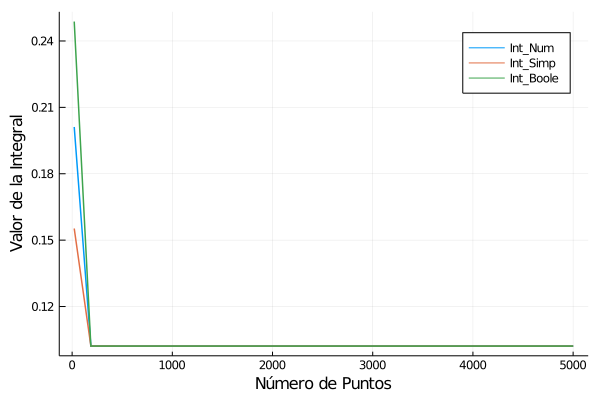

In [70]:
Integral_Num=int_1
Integral_Simp=int_2
Integral_Boole=int_3
plot(num_puntos,Integral_Num,label="Int_Num",lw=1.5,xlabel="Número de Puntos",ylabel="Valor de la Integral")
plot!(num_puntos,Integral_Simp,label="Int_Simp",lw=1.5)
plot!(num_puntos,Integral_Boole,label="Int_Boole",lw=1.5)

Observamos que los 3 algoritmos convergen a 0.1021340744 que es el resultado de la integral que encontramos anteriormente, sin embargo, el algoritmo correspondiente a la regla de Simpson es el que más rápido lo hace, seguido del algoritmo numérico y al final el algoritmo utilizando la regla de Boole.